In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

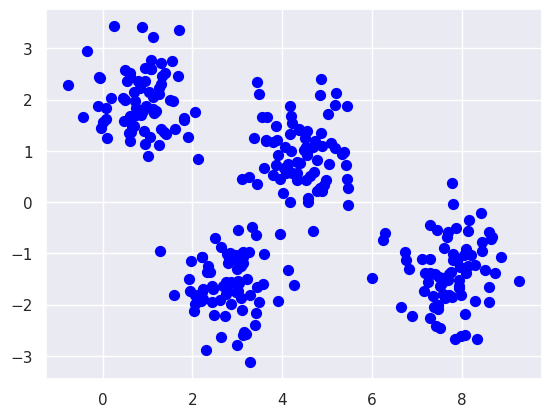

In [51]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.6, random_state=0)
X = X[:, ::-1]
plt.scatter(X[:,0],X[:,1],s=50,color='blue');

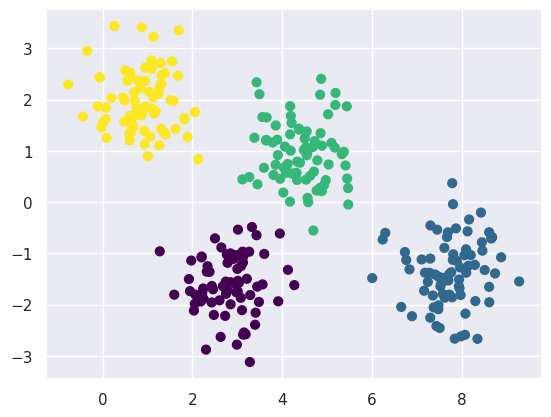

In [45]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4).fit(X)
labels=gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis');

In [44]:
probs=gmm.predict_proba(X)
print(probs[:8].round(3))

[[0.084 0.916]
 [0.    1.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.965 0.035]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]]


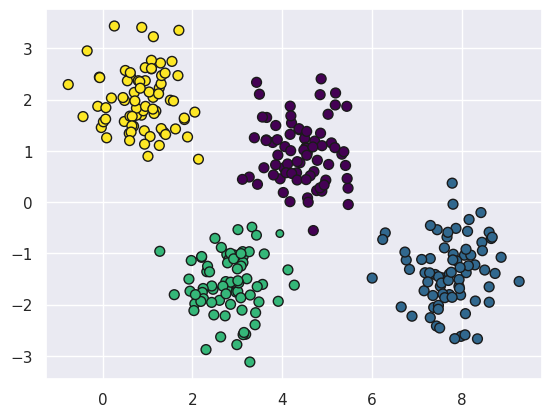

In [43]:
size=probs.max(1)/0.02
plt.scatter(X[:,0],X[:,1],c=labels,edgecolor='k',cmap='viridis',s=size);

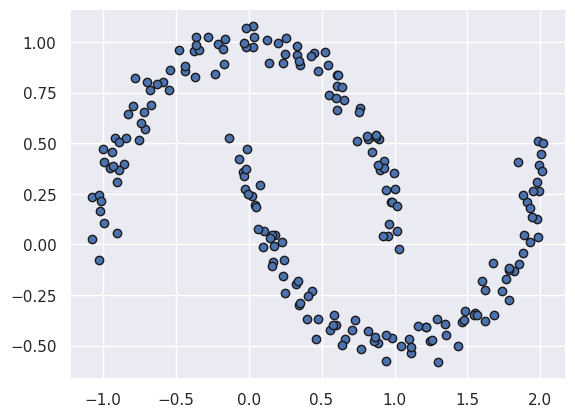

In [46]:
from sklearn.datasets import make_moons
Xmoon,ymoon=make_moons(200,noise=.05,random_state=0)
plt.scatter(Xmoon[:,0],Xmoon[:,1],edgecolor='k');

<ipython-input-57-cce42dffa3bb>:14: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))


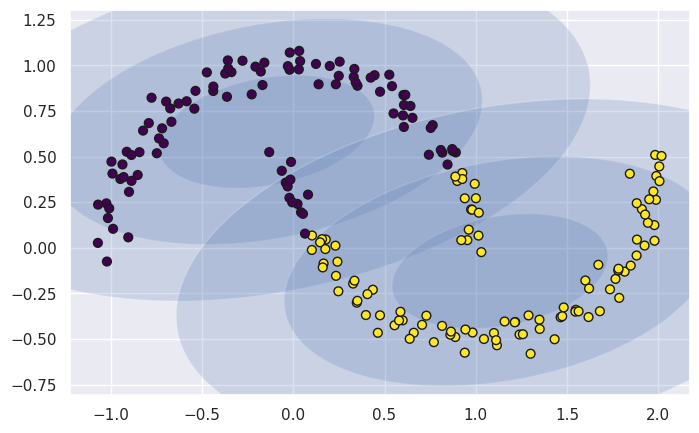

In [57]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
     """Draw an ellipse with a given position and covariance"""
     ax = ax or plt.gca()
     if covariance.shape == (2, 2):
       U, s, Vt = np.linalg.svd(covariance)
       angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
       width, height = 2 * np.sqrt(s)
     else:
          angle = 0
          width, height = 2 * np.sqrt(covariance)
# Draw the Ellipse
     for nsig in range(1, 4):
         ax.add_patch(Ellipse(position, nsig * width, nsig * height,angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  if label:
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis',zorder=2,edgecolor='k')
  else:
    ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2,cmap='viridis',edgecolor='k')
  ax.axis('equal')
  w_factor = 0.2 / gmm.weights_.max()
  for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)
gmm = GaussianMixture(n_components=2, covariance_type='full',random_state=0)
plt.figure(figsize=(8,5))
plot_gmm(gmm, Xmoon)

In [50]:
probs=gmm.predict_proba(Xmoon)
print(probs[:5].round(3))

[[0.    0.    0.    1.   ]
 [0.982 0.    0.    0.018]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.93  0.    0.001 0.069]]


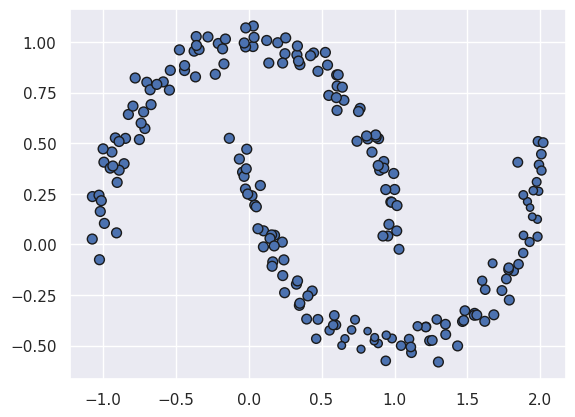

In [59]:
size=probs.max(1)/0.02
plt.scatter(Xmoon[:,0],Xmoon[:,1],edgecolor='k',s=size);